## Individual Assignment Statistical Methods for the Physical Sciences (5214SMFA3Y)
### Timo Halbesma, 6126561, 2015/12/09

In [1]:
# Enable showing plots inside iPython notebook
%matplotlib inline

In [2]:
import scipy
from scipy import stats
import numpy
from matplotlib import pyplot

### Question 1 
If $X \sim U(0,1)$ is a uniform random variable, i.e. $p_X =1$ for $0<x\leq1$, find the pdf and cdf of the transformed variable $Y = − \log(X)$ (using the 'change of variables' transformation relation rules given in the lecture). Note: we define $X$ so as to avoid the x = 0 point. **[3 marks]**


### Answer 1
The cdf is defined as $F(x) = Pr(X \leq x)$ (Vaughan 2013, formula 4.25), and the pdf is defined as $p(x) = \frac{dF(x)}{dx}$ (Vaughan 2013, formula 4.29). Here we transform to $Y = - \log(X)$ and obtain the following cdf
$$F_Y(y) = Pr(Y \leq y) = Pr(-\log(X) \leq y) = Pr(\log(X) \geq -y) = Pr(X \geq e^{-y}) = 1 - Pr(X \leq e^{-y}) = 1 - F_X (e^{-y}) $$

In general, the cdf for a uniform distribution is defined as follows
$$ F(x) =  \begin{cases} 0 & \rm{ for } \, x < a \\ \frac{x-a}{b-a} & \rm{ for } \, x \in [a,b) \\ 1 & \rm{ for } \, x \geq b \end{cases} $$
Here:
$$ F(x) =  \begin{cases} 0 & \rm{ for } \, x < 0 \\ x & \rm{ for } \, x \in [0,1) \\ 1 & \rm{ for } \, x \geq 1 \end{cases}$$

So we can state that $ F_y(y) = 1-e^{-y} $.

And for the pdf
$$ p_Y(y) = \frac{dF_Y(y)}{dy} = \frac{d}{dy} 1-e^{-y} = e^{-y} $$

The remaining issue is with the transformation of the domain boundaries. We want to transform the domain in x-values $0 < x \leq 1$ to the domain in y-values

$$ 0 < x \leq 1 \Rightarrow -\log(0) < e^{-y} \leq -\log(1) \Rightarrow \infty < e^{-y} \leq 0 \Rightarrow \log(\infty) < -y \leq \log(0) \Rightarrow \log(\infty) > y \geq \log(\infty) \Rightarrow \infty > y \geq -\infty  $$.

This gives us limits of $-\infty < y \leq \infty$


The uniform cummulative distribution function of X on 0<x<=1 is:
[ 0.01  0.02  0.03  0.04  0.05  0.06  0.07  0.08  0.09  0.1   0.11  0.12
  0.13  0.14  0.15  0.16  0.17  0.18  0.19  0.2   0.21  0.22  0.23  0.24
  0.25  0.26  0.27  0.28  0.29  0.3   0.31  0.32  0.33  0.34  0.35  0.36
  0.37  0.38  0.39  0.4   0.41  0.42  0.43  0.44  0.45  0.46  0.47  0.48
  0.49  0.5   0.51  0.52  0.53  0.54  0.55  0.56  0.57  0.58  0.59  0.6
  0.61  0.62  0.63  0.64  0.65  0.66  0.67  0.68  0.69  0.7   0.71  0.72
  0.73  0.74  0.75  0.76  0.77  0.78  0.79  0.8   0.81  0.82  0.83  0.84
  0.85  0.86  0.87  0.88  0.89  0.9   0.91  0.92  0.93  0.94  0.95  0.96
  0.97  0.98  0.99]

The uniform probability density function of X on 0<x<=1 is:
[ 1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.

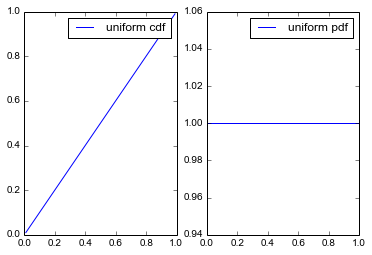

In [3]:
def f(x):
    return -1.0 * numpy.log(x)  # Assuming the assignments uses the natural log.

x = numpy.arange(0.01, 1.0, 0.01)  # 0 < x <= 1
U = scipy.stats.uniform()

print "The uniform cummulative distribution function of X on 0<x<=1 is:\n{0}\n".format(U.cdf(x))
print "The uniform probability density function of X on 0<x<=1 is:\n{0}".format(U.pdf(x))

fig, (ax1, ax2) = pyplot.subplots(1, 2)
ax1.plot(x, U.cdf(x), label='uniform cdf')
ax2.plot(x, U.pdf(x), label='uniform pdf')

ax1.legend()
ax2.legend()
pyplot.show()

### Question 2

A good technique to generate random numbers with a normal distribution is known as the Box-Muller method [1] and involves generating two random numbers, $U_1$ and $U_2$, from a $U(0, 1)$ distribution, and applying the following transformations:

$$ X_1 = \sqrt{-2 \log U_1} \cos(2 \pi U_2) \\
X_2 = \sqrt{-2 \log U_1} \sin(2 \pi U_2) $$

The resulting numbers $X_1$ and $X_2$ should be drawn from a $N(0, 1)$ distribution. Verify that this is the case by using the Box-Muller method to simulate a large number of values and comparing the resulting histogram of those values with the $N(0, 1)$ pdf. **[3 marks]**

[1] From Box & Muller (1958; *The Annals of Mathematical Statistics*, v29, (2), pp. 610-611)

### Answer 2

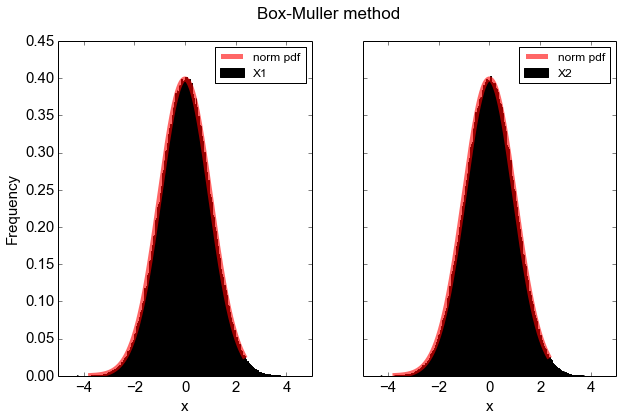

In [4]:
samplesize = 10**6
U1 = numpy.random.uniform(0.0001, 1, samplesize)
U2 = numpy.random.uniform(0.0001, 1, samplesize)
X1 = numpy.sqrt(-2*numpy.log(U1)) * numpy.cos(2*numpy.pi*U2)
X2 = numpy.sqrt(-2*numpy.log(U1)) * numpy.sin(2*numpy.pi*U2)

f, (ax1, ax2) = pyplot.subplots(1, 2, sharey=True, figsize=(10, 6))

ax1.hist(X1, bins=314, facecolor='k', label='X1', normed=True)
ax1.set_xlabel('x', fontsize=15)
ax1.set_ylabel('Frequency', fontsize=15)
ax2.hist(X2, bins=314, facecolor='k', label='X2', normed=True)
ax2.set_xlabel('x', fontsize=15)
ax1.tick_params(axis='both', which='major', labelsize=15)
ax2.tick_params(axis='both', which='major', labelsize=15)
f.suptitle('Box-Muller method', fontsize=17)

# From the Scipy documentation we obtain
x = numpy.linspace(scipy.stats.norm.ppf(0.0001),
                   scipy.stats.norm.ppf(.99), samplesize)
ax1.plot(x, scipy.stats.norm.pdf(x),'r-', lw=5, alpha=0.6, label='norm pdf')
ax2.plot(x, scipy.stats.norm.pdf(x),'r-', lw=5, alpha=0.6, label='norm pdf')

ax1.legend()
ax2.legend()

pyplot.show()

The above plot shows histograms of two uniform distributions of samplesize (here: one million) datapoints that are transformed using the Box-Muller method, using the equations given in the question. The red line indicates the probability distribution function (pdf) of the Scipy built-in normal distribution. Note that this is not a fit, but by simply eyeballing it I guess it is safe to say it is most likely that the Box-Muller method for a large dataset yields a N(0,1) distribution.

### Question 3

This exercise and the following two exercises demonstrate the validity of the Box-Muller method to produce Normal random variables. Find the inverse transformations used in exercise 2 i.e. $U_1$ and $U_2$ as a functions of $X_1$ and $X_2$. **[2 marks]**

### Answer 3
$$ X_1 = \sqrt{-2 \log U_1} \cos(2 \pi U_2) \\
X_2 = \sqrt{-2 \log U_1} \sin(2 \pi U_2) $$

$$
\left.\!
    \begin{array}{c}
\sqrt{-2 \log U_1} = \frac{X_1}{\cos(2 \pi U_2)} \\
\sqrt{-2 \log U_1} = \frac{X_2}{\sin(2 \pi U_2)}
    \end{array}
    \!\right \}
\Rightarrow \frac{X_1}{\cos(2 \pi U_2)} = \frac{X_2}{\sin(2 \pi U_2)}
\Rightarrow \frac{X_2}{X_1} = \frac{\sin(2 \pi U_2)}{\cos(2 \pi U_2)} = \tan(2 \pi U_2) \\
\Rightarrow  U_2 = \frac{1}{2 \pi} \arctan\left(\frac{X_2}{X_1}\right) \quad \square
$$
  
\begin{align}
X_1 = \sqrt{-2 \log U_1} \cos(2 \pi U_2) \Rightarrow U_1 &= \exp{\left(- \frac{1}{2} \left[ \frac{X_1}{\cos(2 \pi U_2)} \right] ^2\right)} \\ 
&= \exp{\left(- \frac{1}{2} \left[ \frac{X_1}{\cos\left(2 \pi \frac{1}{2 \pi} \arctan\left(\frac{X_2}{X_1}\right) \right)} \right] ^2\right)} \\
&= \exp{\left(- \frac{1}{2} \left[ X_1 \sqrt{\left(\frac{X_2}{X_1}\right)^2+1} \right] ^2\right)} \\ 
\\
X_2 = \sqrt{-2 \log U_1} \sin(2 \pi U_2) \Rightarrow U_1 &= \exp{\left(- \frac{1}{2} \left[ \frac{X_2}{\sin(2 \pi U_2)} \right] ^2\right)} \\
&= \exp{\left(- \frac{1}{2} \left[ \frac{X_2}{\sin\left(2 \pi \frac{1}{2 \pi} \arctan\left(\frac{X_2}{X_1}\right) \right)} \right] ^2\right)} \\
&= \exp{\left(- \frac{1}{2} \left[ \frac{X_2}{\frac{\frac{X_2}{X_1}}{\sqrt{\left(\frac{X_2}{X_1}\right)+1}}} \right] ^2\right)} \\
&=\exp{\left(- \frac{1}{2} \left[ X_1 \sqrt{\left(\frac{X_2}{X_1}\right)^2+1} \right] ^2\right)} \\
U_1 &= \exp{\left[ - \frac{1}{2} \left(X_1^2 + X_2^2\right) \right]} \quad \square
\end{align}

We note that the expression for $U_1$ is the same when obtaining it trough rewriting $X_1$ as it is for rewriting $X_2$, and simplifying it in the last step above.

So the final answer is that the inverse transformations of the functions used in exercise 2 i.e. $U_1$ and $U_2$ as a functions of $X_1$ and $X_2$ are as follows.
\begin{align}
U_1 &= \exp{\left[ - \frac{1}{2} \left(X_1^2 + X_2^2\right) \right]} \\
U_2 &= \frac{1}{2 \pi} \arctan\left(\frac{X_2}{X_1}\right)
\end{align}


### Question 4


Find the Jacobian determinant of the inverse transformations from exercise 3

$$ J = \left|\frac{\partial(U_1, U_2)}{\partial(X_1, X_2)}\right| = \begin{vmatrix} \frac{\partial U_1}{\partial X_1} & \frac{\partial U_1}{\partial X_2} \\ \frac{\partial U_2}{\partial X_1} & \frac{\partial U_2}{\partial X_2} \end{vmatrix} = \frac{\partial U_1}{\partial X_1} \frac{\partial U_2}{\partial X_2} - \frac{\partial U_1}{\partial X_2}\frac{\partial U_2}{\partial X_1}$$

**[3 marks]**

### Answer 4

\begin{align}
i) \quad \frac{\partial U_1}{\partial X_1} &= \frac{\partial}{\partial X_1} \left( \exp{\left[ - \frac{1}{2} \left(X_1^2 + X_2^2\right) \right]} \right) \\
&= - X_1 \exp{\left[ - \frac{1}{2} \left(X_1^2 + X_2^2\right) \right]} \\
\\
ii) \quad \frac{\partial U_2}{\partial X_2} &= \frac{\partial}{\partial X_2} \left( \frac{1}{2 \pi} \arctan\left(\frac{X_2}{X_1}\right) \right) \\
&= \frac{1}{2 \pi} \frac{X_1}{X_1^2 + X_2^2} \\
\\
iii) \quad \frac{\partial U_1}{\partial X_2} &= \frac{\partial}{\partial X_2} \left( \exp{\left[ - \frac{1}{2} \left(X_1^2 + X_2^2\right) \right]} \right) \\
&= -X_2 \exp{\left[ - \frac{1}{2} \left(X_1^2 + X_2^2\right) \right]} \\
\\
iv) \quad \frac{\partial U_2}{\partial X_1} &= \frac{\partial}{\partial X_1} \left( \frac{1}{2 \pi} \arctan\left(\frac{X_2}{X_1}\right) \right) \\
&= \frac{1}{2 \pi} \frac{-X_2}{X_1^2 + X_2^2}
\\
\\
J &= \frac{\partial U_1}{\partial X_1} \frac{\partial U_2}{\partial X_2} - \frac{\partial U_1}{\partial X_2}\frac{\partial U_2}{\partial X_1} \\
&= \left(- X_1 \exp{\left[ - \frac{1}{2} \left(X_1^2 + X_2^2\right) \right]} \right) \left( \frac{1}{2 \pi} \frac{X_1}{X_1^2 + X_2^2} \right) - \left(- X_2\exp{\left[ - \frac{1}{2} \left(X_1^2 + X_2^2\right) \right]} \right) \left( \frac{1}{2 \pi} \frac{-X_2}{X_1^2 + X_2^2} \right) \\
&= - \frac{1}{2 \pi} \exp{\left[ - \frac{1}{2} \left(X_1^2 + X_2^2\right) \right]} \left( \frac{X_1^2 + X_2^2}{X_1^2 + X_2^2} \right) \\
&= - \frac{1}{2 \pi} \exp{\left[ - \frac{1}{2} \left(X_1^2 + X_2^2\right) \right]} \quad \square
\end{align}

### Question 5

Use the results from exercises 3 and 4 to write down the joint distribution $p_{X_1, X_2}(x_1, x_2)$ based on the joint distribution $p_{U_1, U_2}(u_1, u_2)$. Use the 'change of variables' transformation relation but in multivariate form, making use of the Jacobian:

$$ p(x_1, x_2) = p(u_1, u_2) \left| \frac{\partial(U_1, U_2)}{\partial(X_1, X_2)} \right| $$

Use the resulting joint distribution to show that $X_1$ and $X_2$ are independent, standard Normal variables. **[3 marks]**

### Answer 5

\begin{align}
p(x_1, x_2) &= p(u_1, u_2) \left| \frac{\partial(U_1, U_2)}{\partial(X_1, X_2)} \right| \\
&= p(u_1, u_2) \left( - \frac{1}{2 \pi} \exp{\left[ - \frac{1}{2} \left(X_1^2 + X_2^2\right) \right]} \right) \\
&= - \left( \frac{1}{\sqrt{2 \pi}} e^{ - X_1^2/2} \right) \left( \frac{1}{\sqrt{2 \pi}} e^{ - X_2^2/2} \right) \quad \square
\end{align}

Since $p(u_1, u_2) = 1$ on the domain $0 < x \leq 1$. From this we can see that the joint distribution is the product of the independent variables $X_1$ and $X_2$, and their distribution has the same form as the Normal distribution with $\sigma = 1$ and $\mu = 0$, thus $X_1$ and $X_2$ are independent, standard Normal variables because `standard' means just that ($\sigma = 1$ and $\mu = 0$).

For completeness, this is the probability density of the Normal distribution:
$$ f(x|\mu, \sigma) = \frac{1}{\sigma \sqrt{2 \pi}} e^{- \frac{(x - \mu)^2}{2 \sigma^2}}$$

### Question 6

You are looking at data from a particle detector to search for a new particle, which your model predicts has an energy of 210 GeV. The detector measures 'events' in 20 discrete energy channels, each channel is 5 GeV wide. Your model predicts the expected number of events that are due to the new particle, but the normalising parameter is unknown (so you don't know in advance how many events to expect due to the new particle). The number of events in each channel will be Poisson-distributed. In the channel where you expect to see your new particle, you detect 7 events. The expected background in that channel is 2.3 events (i.e. these are events which are not associated with your particle, generated by other particles/processes in the detector). Use this information to:

(a) derive a $p$-value and number of sigma significance for the hypothesis that the data in your channel- of-interest are consistent with only background events, and comment on whether your result counts as a significant detection of the particle or not. **[2 marks]**

(b) determine the 3$\sigma$ upper limit on the number of events predicted by the model. **[3 marks]**

### Answer 6


From Vaughan (2013) we obtain equation 5.29 for the Poisson distribution
$$ p(x|\lambda) = \frac{\lambda^x e^{- \lambda}}{x!} $$

Since we are interested in the $p$-value that we will find 7 background events, we assume an expect rate of $\lambda = 2.3$.

$$ p(7|\lambda = 2.3) = \frac{2.3^7 e^{-2.3}}{7!} = 0.00677 $$

And, since this is a in part a coding assignment, we can can have Scipy calculate this for us:

In [5]:
print scipy.stats.poisson.pmf(7, 2.3)

0.00677309250782


In order to say something meaningful about the probability that all 7 events are actually background detections, we need to known the sum of the Poisson probability for a background detection $x \geq 7$, so we sum the probability from 7 (that is including seven!) up to a big number (because we cannot have the computer go up to infinity). Of course, this is equivalent to calculating the cdf for for $x < 7$, or $x \leq 6$ (which is why we plug in a six in the Scipy built-in cdf function).

Now, the sigma significance for the hypothesis is somewhat of a 'bug' in statistics because we have to pretend that the underlying distribution is standard Normal, even though here we have a Poisson distribution. We can then find sigma significance (of underlying standard Normal distribution) for our obtained (Poisson) $p$-value. This is probably part of the 'ongoing conspiracy to confuse students'. 

Anyway, we can use the quantile function (on the standard Normal distribution) to obtain the value (which is the sigma significance) at which our obtained $p$-value is equal to the $p$-value of the standard Normal distribution. The quantile function is the same as the inverse cdf, which is implemented in Scipy by a function named ppf. Mind you, the standard normal distribution is two-sided, so we need to divide our obtained $p$-value by two. We are also interested in the value that lies at the positive side of the domain, which is equal to the absolute value obtained (because the standard Normal distribution is symmetrical about $\mu$, or equal to the value of the ppf function of one minus the $p$-value over two.

Hypothesis: data consistent with only background detections. Method 1: p-value = 0.009362.
Hypothesis: data consistent with only background detections. Method 2: p-value = 0.009362.
Hypothesis: data consistent with only background detections. Sigma significance = 2.599.


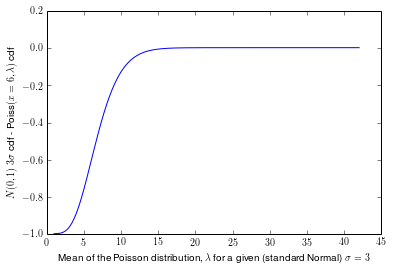

Poisson lambda value = 16.6


In [6]:
# Sum the p-values that an event is a background detection 
p_value = 0
for i in range (7, 10**5):  # obviously, this excludes 7. But this is inportant so just commenting about it.
    p_value += scipy.stats.poisson.pmf(i, 2.3)
print "Hypothesis: data consistent with only background detections. Method 1: p-value = {0:.4G}.".format(p_value)

# Obtain the cummulative distribution function of p-values that 0-6 events are not a background detections.
p_value_not = scipy.stats.poisson.cdf(6, 2.3)
# And then of course calculate one minus this p-value to obtain the p-value for the hypothesis that the data
# are consistent with only background detections.
print "Hypothesis: data consistent with only background detections. Method 2: p-value = {0:.4G}.".format(1-p_value_not)


# Here, we need to divide the p-value over two because the std. normal. dist. is two-sided.
# Here, the 1- to obtain value for positive part of std. normal distr.
sigma = scipy.stats.norm(0., 1.).ppf(1-(p_value/2.))  
print "Hypothesis: data consistent with only background detections. Sigma significance = {0:.4G}.".format(sigma)

# cdf(3) because we are interested in the three sigma upper limit
p_value = 2*(1 - scipy.stats.norm(0., 1.).cdf(3))

def stdnorm_cdf_minus_poisson_cdf(poisson_lambda):
    return p_value - scipy.stats.poisson.cdf(6, poisson_lambda)

# What we call lambda is called mu in Scipy
poisson_lambda = numpy.arange(1, 42, 0.001)
import matplotlib; matplotlib.rc('text', usetex=True)
pyplot.plot(poisson_lambda, stdnorm_cdf_minus_poisson_cdf(poisson_lambda))
pyplot.ylabel(r'$N(0,1)$ $3\sigma$ cdf - Poiss$(x=6, \lambda)$ cdf')
pyplot.xlabel(r'Mean of the Poisson distribution, $\lambda$ for a given (standard Normal) $\sigma=3$')
pyplot.show()

# Now we need to find out where this function starts to equal zero.
print "Poisson lambda value = {0:.4G}".format(scipy.optimize.brentq(stdnorm_cdf_minus_poisson_cdf, 1., 42.))

In [7]:
# Since there was some discussion about which value to plug in to the cdf function, we asked dr. Uttley.
# The advice was to just generate a whole bunch of Poisson values and check.

infinity = 10**8
poisson_values = numpy.random.poisson(lam=2.3, size=infinity)

print len(poisson_values[numpy.where(poisson_values >= 7)])/float(infinity)

# As this number is the roughly (I mean, pseudo-random number generation and assuming a non-infinity value for
# infinity might yield somewhat different results. Also: numerical precision) the same as the p-value obtained
# when plugging in 6 to the cdf, and the value of summing from 7 to a big number is the same as the value
# obtained by plugging in 6 to the cdf, I am now convinced of my answer. The Scipy documentation could have been
# a bit more clear on this point though. But this is exactly why one should distrust third party libraries and may
# never use such a function as a black box. Conclusion: an hour well spent? ... arguably :-P

0.00938187


### Question 7
Data case study B.5 in Vaughan describes measurements of pion cross-section data used to identify the $\Delta^{++}$ resonance. In case you don't have the book, the pdf file accompanying this assignment gives the relevant information from Vaughan. The data (**pedroni.dat**) can be found in the file containing the case study data sets on blackboard. Fit the pion scattering data with the Breit-Wigner model to obtain the MLEs for parameters $N$, $\gamma_0$ and $E_0$. Determine confidence intervals on the model parameters and estimate a p-value for the best-fitting model and comment on whether you think the model is a reasonable description of the data. Finally, plot the data against the best-fitting model (include error bars!), and also plot the residuals. **[8 marks]**

### Answer 7

Here we shall use some formula as found in Vaughan (2013), appendix B.5. Specifically, we adopt equation B.5 and equation B.6 respectively:
\begin{align}
\sigma(E) &= N \frac{\Gamma^2/4}{(E-E_0)^2 + \Gamma^2/4} \\
\Gamma(E) &= \Gamma_0 \left( \frac{E}{130 \rm{ MeV}}\right)^{1/2},
\end{align}
where $\sigma(E)$ is the energy-dependent cross section, $N$ is a normalisation term, $E_0$ is the resonant energy of the interaction (as measured in MeV). This is known in statistics as the Cauchy distribution, which we adopt from Scipy for comparison (never trust third-party libraries, right)?. A more reasonable approximation is obtained when B.5 is combined with B.6, where $\Gamma_0$ is the width of the $\Delta^{++}$ resonance peak.

And in addition, we adopt Vaughan (2013) equation 6.7 to calculate the 'log likelihood' function. We need this to calculate the Maximum-Likelihood Estimations (MLEs) for the parameters $\vec{\theta}$ as the MLEs are those that maximise $l(\vec{\theta})$ given observational data $\vec{y} = \vec{y}^{\rm{obs}}$.

$$ \vec{L}(\vec{\theta}) = \log l(\vec{\theta}) = \log \prod\limits_{i=1}^n p(y_i|\vec{\theta}) = \sum\limits_{i=1}^n \log p(y_i|\vec{\theta})  $$

Next, to calculate the p-value we use Vaughan (2013) equation 7.2 
$$ X_{\rm min}^2 = \sum\limits_{i=1}^{n} \frac{(y_i-\mu_i)^2}{\sigma_i^2}$$.

We calculate a value for $X_{\rm min}^2$, which has a chisquared distribution. Now, if we calculate the cdf we obtain the $p$-value for all values below $X_{\rm min}^2$. Then the $p$-value of our fit is 1 - the chisquared cdf.

Model parameters obtained trough fitting trough scipy.optimize.curve_fit are as follows:
          value     sigma
Gamma_0:  110.23    0.377
E_0:      175.82    0.180
N:        205.02    0.525
The p-value for this fit is 0.2516

Model parameters obtained trough fitting using loglikelihood method are as follows:
          value     sigma
Gamma_0:  110.23    0.349
E_0:      175.82    0.167
N:        205.02    0.488
The p-value for this fit is 0.2516


/usr/local/lib/python2.7/dist-packages/ipykernel/__main__.py:62: RuntimeWarning: divide by zero encountered in log


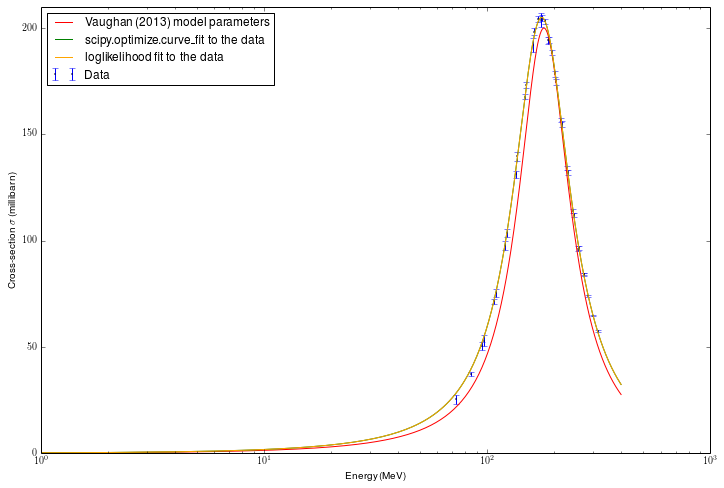

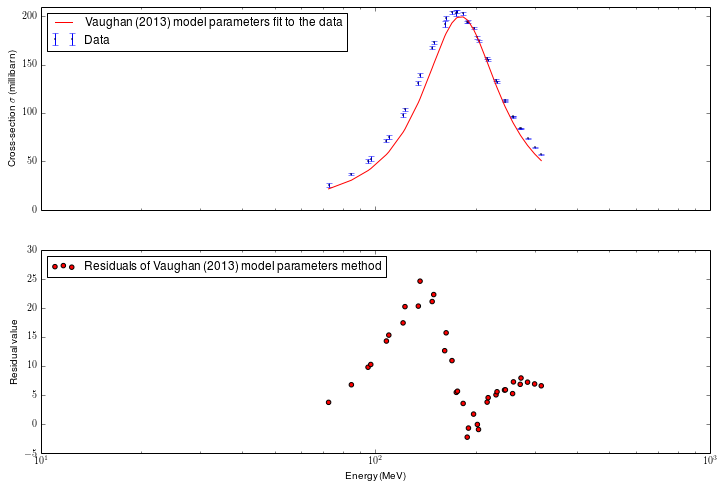

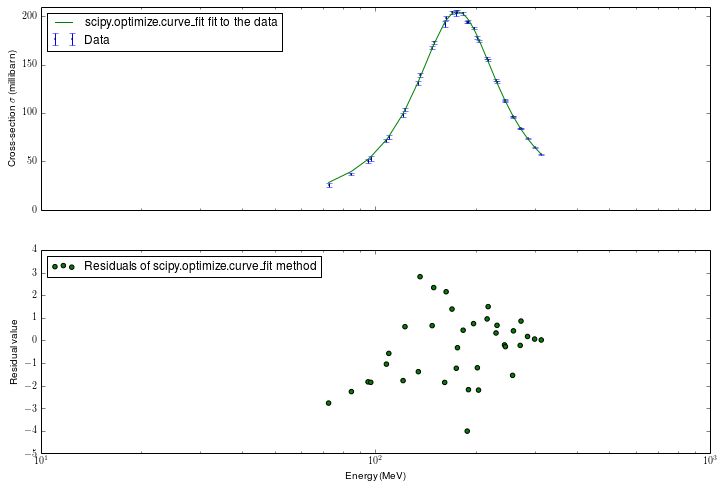

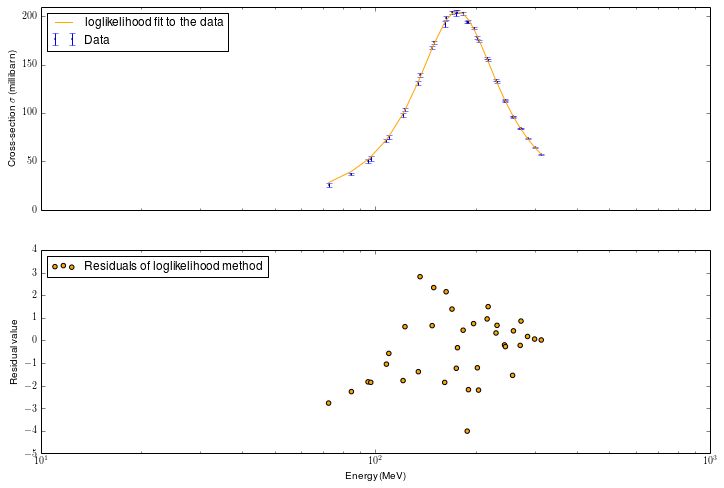

In [8]:
def parse_and_clean_dataset(filename="pedroni.dat", to_get_global_parameters=False):
    pedroni = numpy.genfromtxt(filename, skiprows=1)  # "NA" gets converted to numpy.nan

    # Split up into separate arrays with equal indices for columns
    energy = pedroni[:,0]
    xsect = pedroni[:,1]
    error = pedroni[:,2]
    # target = pedroni[:,3]
    # back = pedroni[:,4]

    # Because Vaughan (2013) does this
    mask_indices = numpy.where(energy <= 313)

    # Remove all values where the energy E > 313
    energy = energy[mask_indices]
    xsect = xsect[mask_indices]
    error = error[mask_indices]
    # target = target[mask_indices]
    # back = back[mask_indices]

    # Back is not used as a parameter, so this code is not required.
    # if not to_get_global_parameters:
    #    print "We still have \"NA\" values after cutting energyies above 313 MeV: {0}\n".format(numpy.nan in back)
    # False, so we do not need to filter this out

    # Order energy: ascending. Because Vaughan (2013) does this
    indx = numpy.argsort(energy)
    energy = energy[indx]
    xsect = xsect[indx]
    error = error[indx]
    
    return energy, xsect, error


def breit_wigner_nonrelativistic(x, gam0, e0, norm):
    ''' Non-relativisitc Breit Wigner. See equation Vaughan (2013) B.5 
        gam0:   width of the resonance
        e0:     resonance energy
        norm:   normalisation
    '''
    
    gam = gam0 * (x/130.)**(1./2)
    return norm * (gam**2/4.) / ((x - e0)**2 + gam**2/4.)


ENERGY, XSECT, ERROR = parse_and_clean_dataset(to_get_global_parameters=True)
def calculate_loglikelihood((gam0_fit, e0_fit, norm_fit), energy=ENERGY, xsect=XSECT, error=ERROR):
    ''' We adopt equation 6.7 from Vaughan (6.7) as described above
        Since we are unable to pass more arguments than the fit parameters to this function,
        we see no alternative than to set the data parameters to global parameters. Blegh.
        ENERGY:     observed value of width of the resonance
        XSECT:      observed value of resonance energy
        ERROR:      observed value of normalisation
        
        gam0_fit:   fitted value of width of the resonance
        e0_fit:     fitted value of resonance energy
        norm_fit:   fitted value of normalisation
    '''
    
    model_values = breit_wigner_nonrelativistic(energy, gam0_fit, e0_fit, norm_fit)
    
    loglikelihood = - numpy.sum(numpy.log(scipy.stats.norm.pdf(xsect, model_values, error)))
    
    if numpy.isnan(loglikelihood) or numpy.isinf(loglikelihood):
        return 10**8
    else:
        return loglikelihood

    
def calculate_chi_squared(y, mu, sigma):
    return numpy.sum((y-mu)**2 / sigma**2)


def plot_residuals(x, y_data, y_error, model_function, model_parameters, model_name):
    f, (ax1, ax2) = pyplot.subplots(2, 1, sharey=False, sharex=True, figsize=(12, 8))
    
    y_model = model_function(x, *model_parameters)
    
    colourmapping = {"Vaughan (2013) model parameters": 'r',
                     "scipy.optimize.curve\_fit": 'g',
                     "loglikelihood": 'orange'}
    
    # ax1.set_title('Data plus fit to data')
    ax1.errorbar(x, y_data, yerr=y_error, fmt='o', markersize=1, label='Data')
    ax1.plot(x, y_model,
             c=colourmapping.get(model_name, 'k'),
             label='{0} fit to the data'.format(model_name))
    # ax1.set_xlabel("Energy (MeV)")
    ax1.set_ylabel(r'Cross-section $\sigma$ (millibarn)')
    ax1.set_ylim(0, 210)
    ax1.set_xscale('log')
    ax1.legend(loc=2)

    # ax2.set_title('Fit residuals')
    ax2.scatter(x, y_data - y_model,
                c=colourmapping.get(model_name, 'k'),
                label='Residuals of {0} method'.format(model_name))
    ax2.set_xlabel("Energy (MeV)")
    ax2.set_ylabel("Residual value")
    ax2.set_xscale('log')
    ax2.legend(loc=2)
    
    # f.suptitle('Individual fit vs. residuals')
    
    # Sum of Squared Total deviations
    # SST = sum (y_data - sample_mean)**2
    # Sum of Squared Model deviations
    # SSM = sum (y_model - sample_mean)**2
    # Sum of squared Error values
    # SSE = sum (y_data - y_model)**2

    # pyplot.show()
    return f
       

def plot_pedroni((energy, xsect, error), plot_Vaughan_BW_model=True,
                 fit_using_scipy_curve_fit=True, fit_using_calculate_loglikelihood=True):
    
    fig = pyplot.figure(figsize=(12, 8))
    ax = fig.add_subplot(1, 1, 1)
    mod_x = numpy.arange(0, 400, 1)
    if plot_Vaughan_BW_model:
        # Range and model parameters obtained from R.Box B.12 in Vaughan (2013) Appendix B.5
        mod_y = breit_wigner_nonrelativistic(mod_x, 100, 180, 200)

    ax.errorbar(energy, xsect, yerr=error, fmt='o', markersize=1, label='Data')
    if plot_Vaughan_BW_model:
        ax.plot(mod_x, mod_y, c='r', label='Vaughan (2013) model parameters')
        plot_residuals(energy, xsect, error, 
                       breit_wigner_nonrelativistic, (100, 180, 200),
                       "Vaughan (2013) model parameters")
    if fit_using_scipy_curve_fit:
        # Fit data using breit_wigner_nonrelativistic formula
        popt, pcov = scipy.optimize.curve_fit(breit_wigner_nonrelativistic, energy, xsect, sigma=error)
    
        # curve_fit returns fit parameter values with
        gam0_fit, e0_fit, norm_fit = popt[0], popt[1], popt[2]
        gam0_fit_sigma, e0_fit_sigma, norm_fit_sigma = numpy.sqrt(numpy.diag(pcov))
        
        fit_y = breit_wigner_nonrelativistic(mod_x, gam0_fit, e0_fit, norm_fit)
        
        Xsquared_min = calculate_chi_squared(
            xsect, breit_wigner_nonrelativistic(energy, gam0_fit, e0_fit, norm_fit), error)
        # ddof: number of datapoints minus degrees of freedom, here we have three fit parameters
        ddof = len(energy)-3
        p_value = 1 - scipy.stats.chi2.cdf(Xsquared_min, ddof)
    
        ax.plot(mod_x, fit_y, c='g', label='scipy.optimize.curve\_fit to the data')
        print "Model parameters obtained trough fitting trough scipy.optimize.curve_fit are as follows:"
        print "{0: <10}{1: <10}{2}".format("", "value", "sigma")
        print "{0: <10}{1:.5G}{2: <4}{3:.3f}\n{4: <10}{5:.5G}{6: <4}{7:.3f}\n{8: <10}{9:.5G}{10: <4}{11:.3f}"\
            .format("Gamma_0:", gam0_fit, "", gam0_fit_sigma,
                    "E_0:", e0_fit, "", e0_fit_sigma,
                    "N:", norm_fit, "", norm_fit_sigma)
        print "The p-value for this fit is {0:.4G}".format(p_value)
        
        plot_residuals(energy, xsect, error, 
                       breit_wigner_nonrelativistic, (gam0_fit, e0_fit, norm_fit),
                       "scipy.optimize.curve\_fit")
    
    if fit_using_calculate_loglikelihood:
        OptimizeResult = scipy.optimize.minimize(calculate_loglikelihood, x0=(100, 180, 200), method='BFGS')
        gam0_fit, e0_fit, norm_fit = OptimizeResult.x[0], OptimizeResult.x[1], OptimizeResult.x[2]
        gam0_fit_sigma, e0_fit_sigma, norm_fit_sigma = numpy.sqrt(numpy.diag(OptimizeResult.hess_inv))
        
        Xsquared_min = calculate_chi_squared(
            xsect, breit_wigner_nonrelativistic(energy, gam0_fit, e0_fit, norm_fit), error)
        # ddof: number of datapoints minus degrees of freedom, here we have three fit parameters
        ddof = len(energy)-3
        p_value = 1 - scipy.stats.chi2.cdf(Xsquared_min, ddof)
    
        
        fit_y = breit_wigner_nonrelativistic(mod_x, gam0_fit, e0_fit, norm_fit)
        ax.plot(mod_x, fit_y, c='orange', label='loglikelihood fit to the data')
            
        print "\nModel parameters obtained trough fitting using loglikelihood method are as follows:"
        print "{0: <10}{1: <10}{2}".format("", "value", "sigma")
        print "{0: <10}{1:.5G}{2: <4}{3:.3f}\n{4: <10}{5:.5G}{6: <4}{7:.3f}\n{8: <10}{9:.5G}{10: <4}{11:.3f}"\
            .format("Gamma_0:", gam0_fit, "", gam0_fit_sigma,
                    "E_0:", e0_fit, "", e0_fit_sigma,
                    "N:", norm_fit, "", norm_fit_sigma)
        print "The p-value for this fit is {0:.4G}".format(p_value)
        
        plot_residuals(energy, xsect, error, 
                       breit_wigner_nonrelativistic, (gam0_fit, e0_fit, norm_fit),
                       "loglikelihood")
        
    ax.set_xlabel("Energy (MeV)")
    ax.set_ylabel(r'Cross-section $\sigma$ (millibarn)')
    ax.set_ylim(0, 210)
    ax.set_xscale('log')
    ax.legend(loc=2)
    # fig.suptitle("Plot of data with Vaughan guesstimate of model parameters and two fits to data")
    pyplot.show()
    
    
plot_pedroni(parse_and_clean_dataset())

So we can see here that the data has a distribution which the initial Vaughan (2013) guesstimation  obtained from R.Box B.12 in Vaughan (2013) Appendix B.5, where the parameters are $\Gamma_0$ = 100, $E_0$ = 180, and $N=$ 200 does not seem to match the data really well (by eyeballing, that is). The $p$-value has not been calculated. More interestingly, the fit parameters are obtained by two methods, (simply) using the scipy.optimize.curve_fit (as a black box), and by doing a bit more work and a bit more careful derivation as is done in the book (references and formulae are given in the comments above the code block). We see that the fit parameters are well matched for both methods, we observe the same $p$-value, but the sigma for the fit parameters is slightly smaller when using the loglikelihood method. The confidence intervals are obtained trough the fit (given as sigma). 

Furthermore, the residuals plots have been generated. For convenience data with the fit has been plotted in a subplot with the residuals beneath, where the x-label matches in the top and bottom plot, and where the colour of the plot matches the colour in the plot with all three models such that comparing is easier.

More interestingly is the interpretation of the $p$-value. From Vaughan (2013): "The outcome of a significance test is a $p$-value, which represents the probability of obtaining a test statistic as or more extreme than observed, if $H_0$ is true.". Here, the probability of obtaining a test statistic as or more extreme than observed in the provided dataset, assuming the null hypothesis (the model and the obtained fit parameters) is true, is 0.2516. I think this is a reasonable value. I mean, one does not expect all observed data to exactly match the model, that would be suspicious.


Final remark: there appears to have been a RuntimeWarning, "divide by zero encountered in log". This is not too troublesome. It is a numerical thingy that I have not had time to smoothen out.

### Question 8

The file **pulsar-timing.txt** (available in the set of data case studies on blackboard) contains data on the timing of the binary pulsar PSR 1913+16. The data are from Taylor & Weisberg (1982; Astrophysical Journal, v235, pp.908-920). They show the 'orbit phase residuals' from precise timing of the orbit of the system. The first column shows the observation, the second the date (in years) the third column shows the phase residual in years and the fourth column shows the error on the phase residual (also years).

If the orbit was (a) constant (at 7.76 hours) the residuals should be constant with time. If the orbit was (b) constant but its period was incorrectly determined the residuals should grow linearly with time. If the period of the system is constantly changing (c) there should be a parabolic change in the residual with time. A constantly increasing period (a quadratically decreasing phase residual) is what we would expect if gravitational waves are radiating energy from the system.

Use weighted least squares (or maximum likelihood assuming normally distributed data) to fit the following models to the data and obtain MLEs of the model parameters:

(a) constant: $y = \alpha$
(b) linear: $y = \alpha + \beta x$
(c) quadratic: $y = \alpha + \beta x + \gamma x^2$
By plotting the data and best-fitting models and data-model residuals, and also determining a p-value for each model, decide which model or models give a reasonable match to the data. Determine confidence intervals on the parameters of the best-fitting model(s). **[8 marks]**

### Answer 8

Model parameters obtained trough fitting constant function are as follows:
          value         sigma
alpha:    -1.0839       0.151
The p-value for this fit is 0
sst = 3.703, sse 1.244, sse = 4.946
Variance of random epsilon 0.4497, ratio = 0.3359


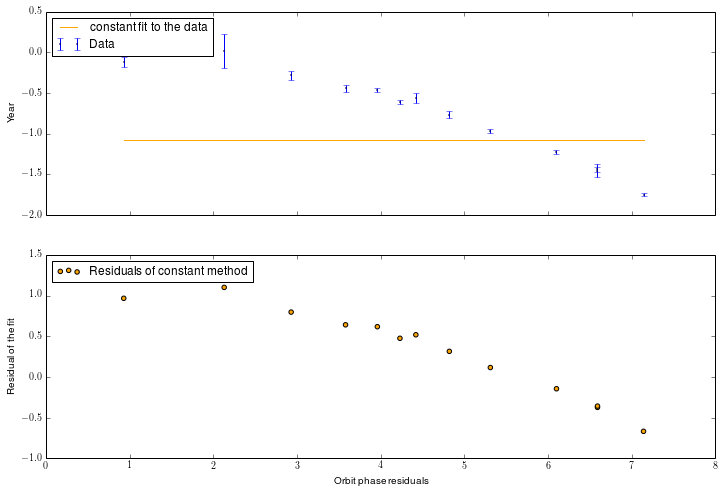


Model parameters obtained trough fitting linear function are as follows:
          value         sigma
alpha:    0.80361       0.133
beta:     -0.34439      0.023
The p-value for this fit is 0
sst = 3.703, sse 4.877, sse = 0.4272
Variance of random epsilon 0.03884, ratio = 1.317


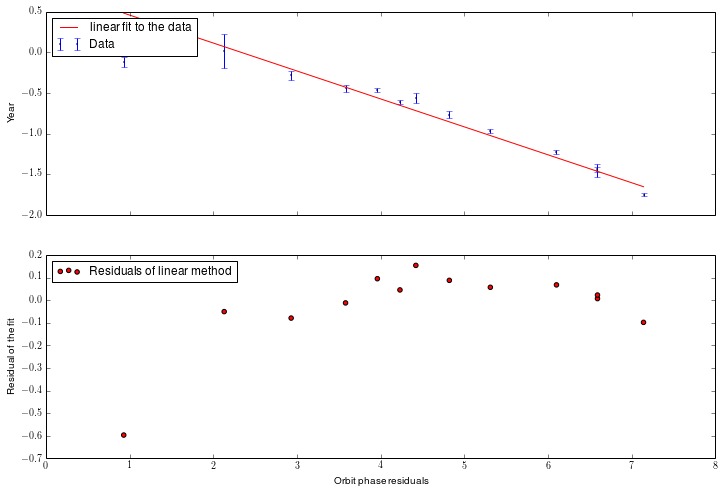


Model parameters obtained trough fitting quadratic function are as follows:
          value         sigma
alpha:    -0.13162      0.083
beta:     0.069589      0.034
gamma:    -0.041377     0.003
The p-value for this fit is 0.3972
sst = 3.703, sse 3.474, sse = 0.04766
Variance of random epsilon 0.004332, ratio = 0.9383


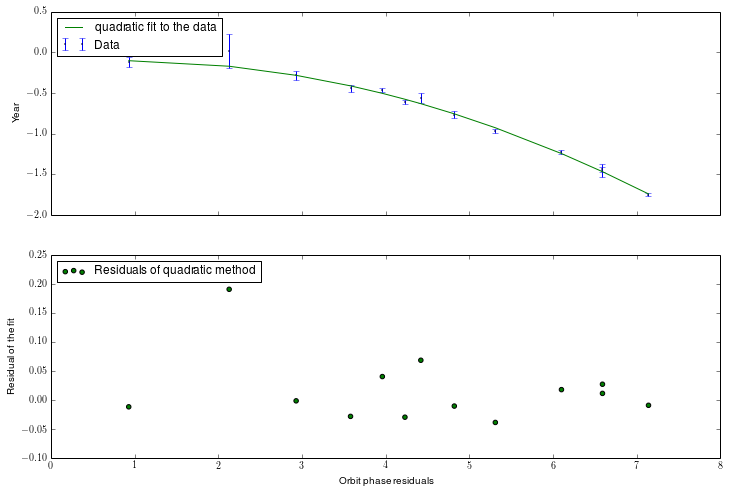

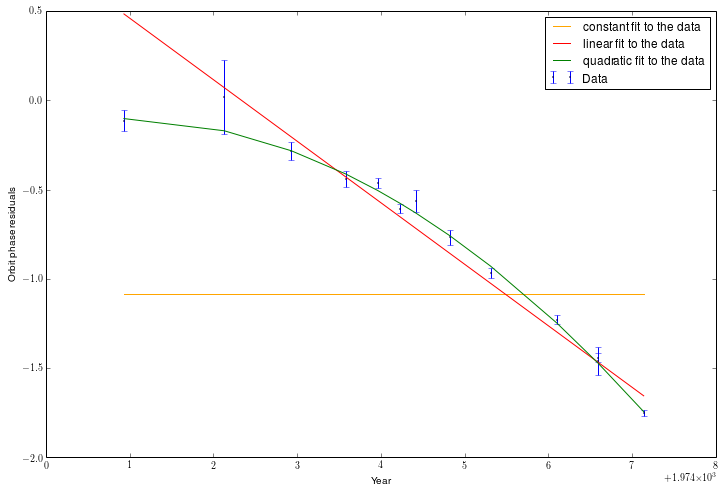

In [9]:
def parse_and_clean_dataset(filename="pulsar-timing.txt"):
    pulsars = numpy.genfromtxt(filename, skiprows=1)  # "NA" gets converted to numpy.nan
    
    obs = pulsars[:, 0]
    date = pulsars[:, 1]
    dt = pulsars[:, 2]
    error = pulsars[:, 3]
    return obs, date, dt, error
    
    
def constant(x, alpha, *ignored_parameters):
    return alpha


def linear(x, alpha, beta, *ignored_parameters):
    return alpha + beta*x
    

def quadratic(x, alpha, beta, gamma):
    return alpha + beta*x + gamma*x**2


def calculate_chi_squared(y, mu, sigma):
    return numpy.sum((y-mu)**2 / sigma**2)


def calculate_p_value(observed_parameter, independent_parameter, observed_error,
                      fit_function=constant, nr_of_fit_parameters=1,
                      parameter1=None, parameter2=None, parameter3=None):

    Xsquared_min = calculate_chi_squared(
        observed_parameter, fit_function(independent_parameter, parameter1, parameter2, parameter3), observed_error)
    
    # ddof: number of datapoints minus degrees of freedom, here we have three fit parameters
    ddof = len(independent_parameter)-nr_of_fit_parameters
    p_value = 1 - scipy.stats.chi2.cdf(Xsquared_min, ddof)
    
    return p_value


def plot_residuals(x, y_data, y_error, model_function, model_parameters, model_name):
    f, (ax1, ax2) = pyplot.subplots(2, 1, sharey=False, sharex=True, figsize=(12, 8))
    
    y_model = model_function(x, *model_parameters)
    

    if model_name == 'constant':
        alpha = model_parameters[0]
        y_model = numpy.full(len(date), alpha, dtype=numpy.float32)
    
    colourmapping = {"constant": 'orange',
                     "linear": 'red',
                     "quadratic": 'green'}
    
    # ax1.set_title('Data plus fit to data')
    ax1.errorbar(x, y_data, yerr=y_error, fmt='o', markersize=1, label='Data')
    ax1.plot(x, y_model,
             c=colourmapping.get(model_name, 'k'),
             label='{0} fit to the data'.format(model_name))
    # ax1.set_xlabel("Energy (MeV)")
    ax1.set_ylabel("Year")
    ax1.legend(loc=2)

    # ax2.set_title('Fit residuals')
    ax2.scatter(x, y_data - y_model,
                c=colourmapping.get(model_name, 'k'),
                label='Residuals of {0} method'.format(model_name))
    ax2.set_xlabel("Orbit phase residuals")
    ax2.set_ylabel("Residual of the fit")
    ax2.legend(loc=2)
    
    # f.suptitle('Individual fit vs. residuals')
    
    # Doing sst, ssm, sse calculations by hand
    # sample_mean = 0
    # for i in range(len(y_data)):
    #     sample_mean += y_data[i]
    # sample_mean = float(sample_mean) / len(y_data)
    
    # sst, ssm, sse = 0, 0, 0
    # for i in range(len(y_data)):
    #     sst += (y_data[i] - sample_mean)**2
    #     ssm += (y_model[i] - sample_mean)**2
    #     sse += (y_data[i] - y_model[i])**2

    # But of course we can numpy this too.
    sample_mean = numpy.mean(y_data)
    sst = numpy.sum((y_data - sample_mean)**2)   # Sum of Squared Total deviations
    ssm = numpy.sum((y_model - sample_mean)**2)  # Sum of Squared Model deviations
    sse = numpy.sum((y_data - y_model)**2)       # Sum of squared Error values
    
    s2 = sse / (len(y_data) - 2)   # Vaughan (2013) eq. 3.22
    r2 = ssm / sst  # Vaughan (2013) eq. 3.23
               
    print "sst = {0:.4G}, sse {1:.4G}, sse = {2:.4G}\nVariance of random epsilon {3:.4G}, ratio = {4:.4G}"\
        .format(sst, ssm, sse, s2, r2)

    pyplot.show()
    # return f


obs, date, dt, error =  parse_and_clean_dataset()
year_offset = 1974
date -= year_offset  # We do this because the fit fails for too large values

popt, pcov = scipy.optimize.curve_fit(constant, date, dt, sigma=error)
alpha_fit = popt[0]
alpha_fit_sigma = numpy.sqrt(numpy.diag(pcov))[0]
p_value = calculate_p_value(dt, date, error, constant, 1, alpha_fit)
print "Model parameters obtained trough fitting constant function are as follows:"
print "{0: <10}{1: <14}{2}".format("", "value", "sigma")
print "{0: <10}{1:.5G}{2: <7}{3:.3f}".format("alpha:", alpha_fit, "", alpha_fit_sigma)
print "The p-value for this fit is {0:.4G}".format(p_value)
constant_fit =  numpy.full(len(date), alpha_fit, dtype=numpy.float32)
plot_residuals(date, dt, error, constant, (alpha_fit,), "constant")


popt, pcov = scipy.optimize.curve_fit(linear, date, dt, sigma=error)
alpha_fit, beta_fit = popt[0], popt[1]
alpha_fit_sigma, beta_fit_sigma = numpy.sqrt(numpy.diag(pcov))
p_value = calculate_p_value(dt, date, error, linear, 2, alpha_fit, beta_fit)
print "\nModel parameters obtained trough fitting linear function are as follows:"
print "{0: <10}{1: <14}{2}".format("", "value", "sigma")
print "{0: <10}{1:.5G}{2: <7}{3:.3f}\n{4: <10}{5:.5G}{6: <6}{7:.3f}"\
    .format("alpha:", alpha_fit, "", alpha_fit_sigma,
            "beta:", beta_fit, "", beta_fit_sigma)
print "The p-value for this fit is {0:.4G}".format(p_value)
linear_fit = linear(date, alpha_fit, beta_fit)
plot_residuals(date, dt, error, linear, (alpha_fit, beta_fit), "linear")

popt, pcov = scipy.optimize.curve_fit(quadratic, date, dt, sigma=error)
alpha_fit, beta_fit, gamma_fit = popt[0], popt[1], popt[2]
alpha_fit_sigma, beta_fit_sigma, gamma_fit_sigma = numpy.sqrt(numpy.diag(pcov))
p_value = calculate_p_value(dt, date, error, quadratic, 3, alpha_fit, beta_fit, gamma_fit)
print "\nModel parameters obtained trough fitting quadratic function are as follows:"
print "{0: <10}{1: <14}{2}".format("", "value", "sigma")
print "{0: <10}{1:.5G}{2: <6}{3:.3f}\n{4: <10}{5:.5G}{6: <6}{7:.3f}\n{8: <10}{9:.5G}{10: <5}{11:.3f}"\
    .format("alpha:", alpha_fit, "", alpha_fit_sigma,
            "beta:", beta_fit, "", beta_fit_sigma,
            "gamma:", gamma_fit, "", gamma_fit_sigma)
print "The p-value for this fit is {0:.4G}".format(p_value)
quadratic_fit = quadratic(date, alpha_fit, beta_fit, gamma_fit)
plot_residuals(date, dt, error, quadratic, (alpha_fit, beta_fit, gamma_fit), "quadratic")


pyplot.figure(figsize=(12, 8))
pyplot.errorbar(date+year_offset, dt, yerr=error, fmt='o', markersize=1, label='Data')
pyplot.plot(date+year_offset, constant_fit, c='orange', label='constant fit to the data')
pyplot.plot(date+year_offset, linear_fit, c='r', label='linear fit to the data')
pyplot.plot(date+year_offset, quadratic_fit, c='g', label='quadratic fit to the data')
pyplot.xlabel("Year")
pyplot.ylabel("Orbit phase residuals")
pyplot.legend(loc=1)

pyplot.show()

Note that here I have chosen not to repeat the double-method thing I did in question 7, because the previous question has shown that they are comparable and work equally well, I would say. Using the curve_fit is just faster and easier, so this method has been chosen as the preferred method.
 
Note here that we subtract year_offset equal to 1974 (selected by hand by visually observing the data). We do so because the fit function appears to break down for rather large values. By subtracting the lowers value, all values lie in a small range from 0.93 up to 7.14, which does not cause the fit function to break down. Should the dataset have been larger, this process would have been automated (e.g. by selecting the lowest value of the parameter as year_offset). Mind you, the fit parameters are valid for the data with the year_offset subtracted. It is trivial to obtain the fit parameters would we not have subtracted a value from the data. Note, however, that the plot is much more interesting because it provides visual hints whether or not the fit is accurate, and the $p$-value provides a statistically more solid way to determine which fit is best.

From the results we can see that the constant and linear fit are not reasonable, since the $p$-value is zero. On the other hand, the $p$-value for the quadratic fit is 0.3972, which I would say is reasonably good.

We have also calculated the SST, SSM, and SSE. From this we can then obtain the values for $S^2$ and $r^2$. The first value estimates the size of the errors, that is the variance of the error $\epsilon$ on the fit. Not that this is not the same as the value obtained by the fit function, which is the 1 $\sigma$ confidence interval. The second value, the value of $r^2$ quantifies the fraction of the variance of the data that is explaned by the model. In the case of our quadratic fit, this is 0.9383 which is close to unity. We can therefore conclude that this model reasonably explains the variance seen in de data.


### Question 9

The data file attached to this assignment, **cygx1_xray.dat**, contains a time-series of 2–13 keV X-ray flux measurements for the black hole X-ray binary system Cygnus X-1, obtained by NASA's Rossi X-ray Timing Explorer satellite. The data are measured in time bins of 0.125 s duration, and the flux is given in units of counts per second. Note that the data contains some zeros in the middle of the series corresponding to a detector cut-out - you will need to remove these from the series once you have loaded the data. For the purpose of this exercise you may ignore the observational errors on the flux measurements, which are relatively small. The *intrinsic* flux variability is itself a random process however. The X-ray flux variations are thought to be driven by turbulence in the accretion flow of matter on to the black hole, so the statistical properties of the data can give useful information about this process.

The aim of this exercise is to use ML fitting and significance tests to find out what is the best-fitting underlying probability distribution of the X-ray flux measurements from Cyg X-1. You have encountered a number of different probability distributions during the course, one of which is a good representation of the data. You should find out which distribution it is, and what the MLEs of the parameters of the distribution are, also determining confidence intervals on the parameters of the *best-fitting distribution*. You should also plot the data versus the best-fitting distribution, plot the data−model residuals, and use p-values to determine whether the fit is good, and also compare with other distributions, to justify your choice of model.

*Hints:* Clearly, for the purpose of this exercise, this is univariate data, and so you will need to make a histogram of the data and fit that - be careful to use enough bins to allow the distribution to be clearly seen! The models to be fitted can be found in the **scipy.stats** module (google it to find out about the available distributions and what their parameters are!). Bear in mind that your histogram or model will need to be scaled accordingly, and that to be more precise in your fit (depending on bin width) you may need to account for the fact that the numbers of flux measurements in each histogram bin are effectively an integral over the width of the bin - they may not simply correspond to the pdf/pmf evaluated at the the bin centre! Also, you will need to come up with a statistical model for the number of values in each bin. Remember that the observed X-ray flux measurements are effectively samples of an underlying population with the pdf you are looking for. **[10 marks]**

### Answer 9

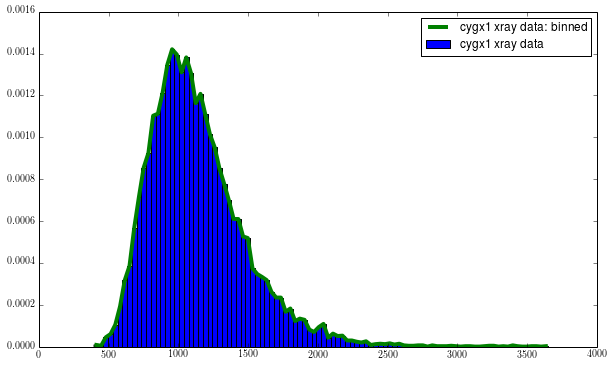

inf
94

Model parameters obtained trough fitting norm function are as follows:
          value         sigma
1:        1136.5       0.000
2:        342.74      0.000
The p-value for this fit is incorrectly calculated
inf
93

Model parameters obtained trough fitting lognorm function are as follows:
          value         sigma
1:        0.34079      0.000
2:        166.32      0.000
3:        915.27     0.000
The p-value for this fit is incorrectly calculated
inf
94

Model parameters obtained trough fitting rayleigh function are as follows:
          value         sigma
1:        395.22       0.000
2:        577.45      0.000
The p-value for this fit is incorrectly calculated
inf
93

Model parameters obtained trough fitting t function are as follows:
          value         sigma
1:        5.8076      0.000
2:        1101.5      0.000
3:        276.99     0.000
The p-value for this fit is incorrectly calculated
inf
93

Model parameters obtained trough fitting chi2 function are as follo

/usr/local/lib/python2.7/dist-packages/ipykernel/__main__.py:133: RuntimeWarning: divide by zero encountered in divide


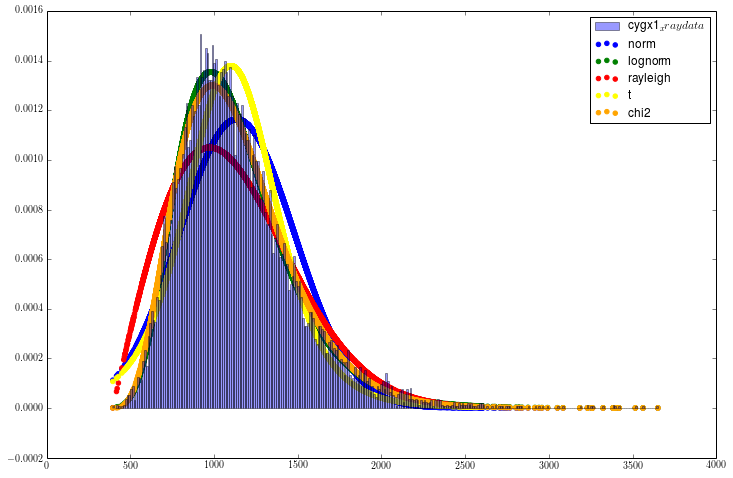

In [10]:
def parse_and_clean_dataset(filename="cygx1_xray.dat"):
    cygx1 = numpy.genfromtxt(filename, skiprows=1)  # "NA" gets converted to numpy.nan
    
    bins = cygx1[:, 0]
    rate = cygx1[:, 1]  # counts per second
    
    # time = 0.125 * bins  # in seconds
    
    # Clean zeros due to detector cut-out
    # NB, index of 'good' i.e. non-zero values
    index = numpy.where(rate >= 0.00001)  # note that we cannot say 'is 0' because floating point :-)
    
    return bins[index], rate[index]


def plot_residuals(x, y_data, y_error, model_function, model_parameters, model_name):
    f, (ax1, ax2) = pyplot.subplots(2, 1, sharey=False, sharex=True, figsize=(12, 8))
    
    y_model = model_function(x, *model_parameters)
    
    colourmapping = {"constant": 'orange',
                     "linear": 'red',
                     "quadratic": 'green'}
    
    ax1.errorbar(x, y_data, yerr=y_error, fmt='o', markersize=1, label='cygx1 xray data')
    ax1.plot(x, y_model,
             c=colourmapping.get(model_name, 'k'),
             label='{0} fit to the data'.format(model_name))
    ax1.set_ylabel("Time (s)")
    ax1.set_yscale('log')
    ax1.legend(loc=2)

    ax2.scatter(x, y_data - y_model,
                c=colourmapping.get(model_name, 'k'),
                label='Residuals of {0} method'.format(model_name))
    ax2.set_xlabel("Rate (counts/s)")
    ax2.set_ylabel("Residual of the fit")
    ax2.set_yscale('log')
    ax2.legend(loc=2)
    
    sample_mean = numpy.mean(y_data)
    sst = numpy.sum((y_data - sample_mean)**2)   # Sum of Squared Total deviations
    ssm = numpy.sum((y_model - sample_mean)**2)  # Sum of Squared Model deviations
    sse = numpy.sum((y_data - y_model)**2)       # Sum of squared Error values
    
    s2 = sse / (len(y_data) - 2)   # Vaughan (2013) eq. 3.22
    r2 = ssm / sst  # Vaughan (2013) eq. 3.23
               
    print "sst = {0:.4G}, sse {1:.4G}, sse = {2:.4G}\nVariance of random epsilon {3:.4G}, ratio = {4:.4G}"\
        .format(sst, ssm, sse, s2, r2)

    pyplot.show()
    # return f

    
def poisson(x, loc, scale):
    ''' loc is lambda, scale is k '''
    return loc**scale, numpy.exp(-1.*loc)/scipy.misc.factorial(scale, exact=False)
def norm(x, loc, scale):
    ''' loc is mu, scale is stdev'''
    return 1/(scale*numpy.sqrt(2*numpy.pi)) * numpy.exp(-1.*(x - loc)**2/(2.*scale**2))
    # return scipy.stats.norm.pdf(x, scale=sigma)

    

def plot_data_simple(bins, rate):
    pyplot.figure(figsize=(12, 8))
    pyplot.errorbar(bins, rate, yerr=numpy.zeros(len(rate)), fmt='o', markersize=1, label='cygx1_xray data')
    pyplot.xlabel("Bin number")
    pyplot.ylabel("Rate (counts/seconds)")
    pyplot.legend(loc=1)
    pyplot.show()
    

def create_simple_histogram(bins, rate, binned_rate, binned_rate_edges, nr_of_bins=314):
    f, (ax1) = pyplot.subplots(1, 1, sharey=True, figsize=(10, 6))
    ax1.hist(rate, bins=nr_of_bins, facecolor='b', label='cygx1 xray data', normed=True)
    ax1.plot(binned_rate_edges, binned_rate, lw=4, label="cygx1 xray data: binned")
    ax1.legend(loc=1)
    pyplot.show()
    
    
def bootstrap(x_data, y_data, y_data_err):
    """ Bootstrapping method """

    params = []

    data = numpy.transpose([x_data, y_data, y_data_err])
    n_boot = int(len(x_data) * (numpy.log(len(x_data)))**2)
    idx = numpy.random.randint(0, len(x_data), (n_boot, len(x_data)))
    samples = data[idx]

    # TODO: fix this such that we can bootstrap the errors on the fit
    func = lambda x, a, b: x*a+b

    for i in range(n_boot):
        r, pcov = scipy.optimize.curve_fit(
            func, samples[i][:, 0], samples[i][:, 1],
            sigma=samples[i][:, 2], p0=(1, 1))

        params.append(r.tolist())

    params = numpy.array(params)

    f, (ax1, ax2) = pyplot.subplots(1, 2, sharey=True, figsize=(10, 6))

    ax1.hist(params[:, 0], histtype='step')
    ax1.set_xlabel('Values for parameter a', fontsize=15)
    ax1.set_ylabel('Frequency', fontsize=15)
    ax2.hist(params[:, 1], histtype='step')
    ax2.set_xlabel('Values for parameter b', fontsize=15)
    ax1.tick_params(axis='both', which='major', labelsize=15)
    ax2.tick_params(axis='both', which='major', labelsize=15)
    f.suptitle('Bootstrapping Linear Regression Parameters', fontsize=17)

    pyplot.show()

    stata = numpy.sort(params[:, 0])
    statb = numpy.sort(params[:, 1])
    low_a, high_a = (stata[int((0.318/2.0)*n_boot)],
                     stata[int((1-0.318/2.0)*n_boot)])
    low_b, high_b = (statb[int((0.318/2.0)*n_boot)],
                     statb[int((1-0.318/2.0)*n_boot)])

    mean_a = numpy.mean(params[:, 0])
    mean_b = numpy.mean(params[:, 1])

    print "Mean value of a is {0:.2f}, and mean value of b is {1:.2f}"\
        .format(mean_a, mean_b)
    print "The 68.2 percent confidence interval for a is [{0:.2f}, {1:.2f}]."\
        .format(low_a, high_a)
    print "The 68.2 percent confidence interval for b is [{0:.2f}, {1:.2f}]."\
        .format(low_b, high_b)
    

def calculate_chi_squared(y, mu, sigma):
    return numpy.sum((y-mu)**2 / sigma**2)
    
    
def calculate_p_value(observed_parameter, independent_parameter, observed_error,
                      fit_function, nr_of_fit_parameters,
                      parameter1=None, parameter2=None, parameter3=None):
    
    if nr_of_fit_parameters == 2:
        Xsquared_min = calculate_chi_squared(observed_parameter,
                                             fit_function(independent_parameter, parameter1, parameter2),
                                             observed_error)
    if nr_of_fit_parameters == 3:
        Xsquared_min = calculate_chi_squared(observed_parameter,
                                             fit_function(independent_parameter, parameter1, parameter2, parameter3),
                                             observed_error)
    
    print Xsquared_min
    # ddof: number of datapoints minus degrees of freedom, here we have three fit parameters
    ddof = len(independent_parameter)-nr_of_fit_parameters
    print ddof
    p_value = 1 - scipy.stats.chi2.cdf(Xsquared_min, ddof)
    
    return p_value


def fit_distributions_to_data(bins, rate):
    # We set the number of bins as a function of the number of datapoints
    nr_of_bins = 10*numpy.log(len(rate))
    binned_rate, binned_rate_edges = numpy.histogram(rate, bins=nr_of_bins, density=True)
    sample_size = len(binned_rate)
    binned_rate_centered = numpy.zeros(sample_size)
    error = numpy.zeros(sample_size)
    
    # Sum both edges of a bin, divide by two as to average the bin value such that we have the center value
    for i in range(len(binned_rate)):
        binned_rate_centered[i] = (binned_rate_edges[i] + binned_rate_edges[i+1])/2
    
        # error[i] = numpy.sqrt(numpy.std(binned_rate[i])/sample_size)  # Vaughaun (2013) eq. 2.4
        error[i] = numpy.sqrt(binned_rate[i])
    
    create_simple_histogram(bins, rate, binned_rate, binned_rate_centered, nr_of_bins)
    
    # print "Is this histogram normalized? This is so if the following value equals 1: sum = {0}"\
    #     .format(numpy.sum(hist*numpy.diff(rate_bin_edges)))
    
    
    # Now, in order to fit we would prefer to use the same methods as used in the previous assignments
    # However, for a number of technical reasons this breaks down. But not to worry, we can simply
    # use the built-in scipy.stats.distname.fit function, which returns fit parameters. Then,
    # to calculate the errors we use bootstrapping, and to calculate p-values we just use the calculate_p_value
    # method developed earlier, which luckily I have already written generic :-). One issue, though, is that
    # we require error measures. We have assumed Vaughan (2013) equation 2.4 to provide us with the standard
    # error.
    pyplot.figure(figsize=(12, 8))
    pyplot.hist(rate, bins=314, facecolor='b',
                alpha=0.4, label='cygx1_xray data', normed=True)
    
    distributions = ["norm", "lognorm", "rayleigh", "t", "chi2"]
    colourmapping = {"norm": 'blue',
                     "rayleigh": 'red',
                     "lognorm": 'green',
                     "t": 'yellow',
                     "chi2": 'orange'}
    for d in distributions:
        dist_attr = getattr(scipy.stats, d)
        fit_parameters = dist_attr.fit(rate)
        
        if len(fit_parameters) == 2:
            param1, param2 = fit_parameters
            pyplot.scatter(rate, dist_attr.pdf(rate, loc=param1, scale=param2),
                           c=colourmapping.get(d, 'black'),
                           edgecolors=colourmapping.get(d, 'black'),
                           label=d)
            
            # Bootstrapping TODO
            param1_sigma = 0.
            param2_sigma = 0.
            
            # NB we use binned rate here, which we binned ourselves. 
            # We can therefore calculate the p-value of the model with the given parameters,
            # but the binning here is different from the binning the (black box) fit function
            # has used, which we sadly do not know.
            p_value = calculate_p_value(binned_rate, binned_rate_centered, error,
                                        dist_attr.pdf, 2,
                                        parameter1=param1, parameter2=param2)
            
            print "\nModel parameters obtained trough fitting {0} function are as follows:".format(d)
            print "{0: <10}{1: <14}{2}".format("", "value", "sigma")
            print "{0: <10}{1:.5G}{2: <7}{3:.3f}\n{4: <10}{5:.5G}{6: <6}{7:.3f}"\
                .format("1:", param1, "", param1_sigma,
                        "2:", param2, "", param2_sigma)
            print "The p-value for this fit is {pval}".format(pval=p_value if p_value >= 0.00001 else "incorrectly calculated")
        if len(fit_parameters) == 3:
            param1, param2, param3 = fit_parameters
            pyplot.scatter(rate, dist_attr.pdf(rate, param1, loc=param2, scale=param3),
                           c=colourmapping.get(d, 'black'),
                           edgecolors=colourmapping.get(d, 'black'),
                           label=d)
            
            # Bootstrapping
            param1_sigm = 0.
            param2_sigma = 0.
            param3_sigma = 0.
            
            # Same comment about binned_rate!
            p_value = calculate_p_value(binned_rate, binned_rate_centered, error,
                                        dist_attr.pdf, 3,
                                        parameter1=param1, parameter2=param2, parameter3=param3)
            
            print "\nModel parameters obtained trough fitting {0} function are as follows:".format(d)
            print "{0: <10}{1: <14}{2}".format("", "value", "sigma")
            print "{0: <10}{1:.5G}{2: <6}{3:.3f}\n{4: <10}{5:.5G}{6: <6}{7:.3f}\n{8: <10}{9:.5G}{10: <5}{11:.3f}"\
                .format("1:", param1, "", param1_sigma,
                        "2:", param2, "", param2_sigma,
                        "3:", param3, "", param3_sigma)
            print "The p-value for this fit is {pval}".format(pval=p_value if p_value >= 0.00001 else "incorrectly calculated")
        
    pyplot.legend()
    pyplot.show()


bins, rate = parse_and_clean_dataset()
fit_distributions_to_data(bins, rate)

By eye the best-fitting distribution would either be the lognorm distribution, or the chi2 distribution. These fits are obtained using the built-in scipy.stats.rv_continuous.fit, which does only return fit values but not p-values, no errors on the MLEs. Moreover, nothing is known about binning, but the source code on this can be inspected and the binning seems to do something smart. However, it is difficult to compare the data I have binned myself to the distribution but this should work assuming the obtained distribution is continuous (we only fit continious models). Then the binned data can be plugged into the model formula with the given MLEs and it should be fine as the binning is the same for the independent variable, the data and the model values.

There are some technical issues with the methods developed in the previous sections, so they cannot simply be used to calculate the p-values and the errors. Both methods break down and I cannot get them to work, so the best option was to use the (black box!) built-in method as described above. In order to calculate the errors, I thought to use the bootstrapping method as implemented in the previous (group) assignment. However, the same technical problem occurs in this method (that is, we cannot pass the scipy.stat.distribution.pdf to the scipy.optimize.curve_fit method and if we do manage to do so by writing our own method that returns the pdf method values for a given input, then the resulting fit parameters are 1.0, which is the initial guess value the parameters are set to, and the error is infinite).

So, basically the only interesting thing I have been able to generate for this part of the assignment is the plot showing a histogram of the data and several fits to these data. I have also been able to bin the data myself in a sort of elegant way, which turned out to be no longer needed when using the built-in fit method.